<img align="left" src="../img/notebook_banner_siegel.png" style="width:1100px;">

## <b> Time series analysis (Pandas) <b>


The package [pandas](http://pandas.pydata.org/) can be used for time-series analyzes, an important task in every geoscientific domain. If you want to know more, Wes McKinney give you an older but great introduction [here](http://pyvideo.org/video/1198/time-series-data-analysis-with-pandas).

<b> Module import <b>

First we have to import necessary modules:

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
pd.set_option('max_rows',15) # this limit maximum numbers of rows
np.set_printoptions(precision=3 , suppress= True) # this is just to make the output look better


In [60]:
pd.__version__

'1.1.5'

<b>Loading data<b>

Pandas has very good IO capabilities and we are going to use them to load our data and convert it to the time series:

In [61]:
more ./DelhiTmax.txt

 1944  1  1     22.20
 1944  1  3     23.90
 1944  1  4     22.20
 1944  1  6     22.80
 1944  1  7     22.20
 1944  1  8     16.70
 1944  1  9     20.60
 1944  1 11     21.10
 1944  1 15     20.00
 1944  1 19     24.40
 1944  1 20     24.40
 1944  1 21     25.00
 1944  1 22     18.90
 1944  1 23     20.00
 1944  1 26     17.20
 1944  1 27     18.30
 1944  1 28     20.00
 1944  1 29     19.40
 1944  1 31     20.00
 1944  2  4     22.80
 1944  2  5     22.80
 1944  2  6     21.10
 1944  2  7     22.80
 1944  2  8     22.80
 1944  2  9     22.80
 1944  2 12     23.90
 1944  2 14     26.10
 1944  2 16     25.60
 1944  2 17     26.70
 1944  2 18     26.10
 1944  2 19     21.10
 1944  2 20     22.80
 1944  2 21     22.20
 1944  2 22     23.90
 1944  2 25     23.90
 1944  2 27     27.20
 1944  2 29     24.40
 1944  3  2     26.70
 1944  3  3     27.20
 1944  3  4     27.80
 1944  3  5     30.60
 1944  3  6     29.40
 1944  3  7     27.20
 1944  3 10     31.70
 1944  3 11     32.20
 1944  3 1

In [62]:
tmax = pd.read_csv('./DelhiTmax.txt', delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)

Here we read our data from file, telling pandas, that delimiter is a space, that it has to combine information in the 0th, 1st and 2nd columns and try to understand it as a date, and that there is no header presented in the original data.

In [63]:
tmax

,0_1_2,3
0,1944-01-01,22.2
1,1944-01-03,23.9
2,1944-01-04,22.2
3,1944-01-06,22.8
4,1944-01-07,22.2
...,...,...
15431,2015-02-24,28.6
15432,2015-02-25,28.6
15433,2015-02-26,27.6
15434,2015-02-27,27.6


Rename columns:

In [64]:
tmax.columns = ['Date', 'Temp']

Set "Date" column to be our index (instead of 1,2,3....), so pandas can understand, that our data is actually a time series.

In [65]:
tmax = tmax.set_index(['Date'])

In [66]:
tmax.head(3)

,Temp
Date,
1944-01-01,22.2
1944-01-03,23.9
1944-01-04,22.2


Plot all data:

<AxesSubplot:xlabel='Date'>

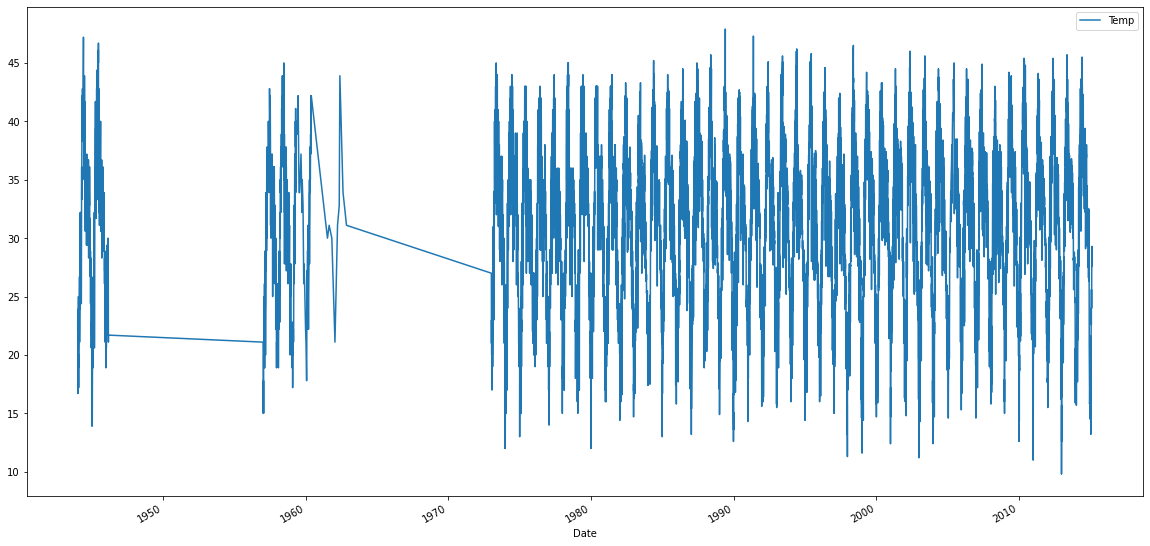

In [67]:
tmax.plot(figsize=(20,10))

Only a decade:

<AxesSubplot:xlabel='Date'>

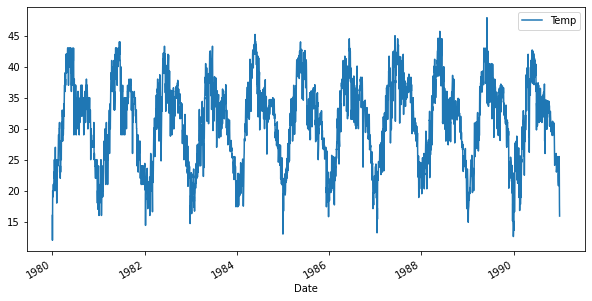

In [68]:
tmax['1980':'1990'].plot(figsize=(10,5))

or two month:

<AxesSubplot:xlabel='Date'>

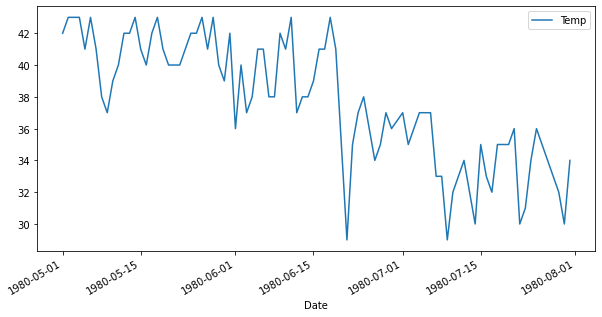

In [69]:
tmax['1980-05':'1980-07'].plot(figsize=(10,5))

Reference to the time periods is done in a very natural way. You, of course, can also get individual values. By index (date in our case): 

In [70]:
tmax['1980-01-02':'1980-01-02']

,Temp
Date,
1980-01-02,16.0


By exact location:

In [71]:
tmax.iloc[2]

Temp    22.2
Name: 1944-01-04 00:00:00, dtype: float64

We can also plot one month by using

<AxesSubplot:xlabel='Date'>

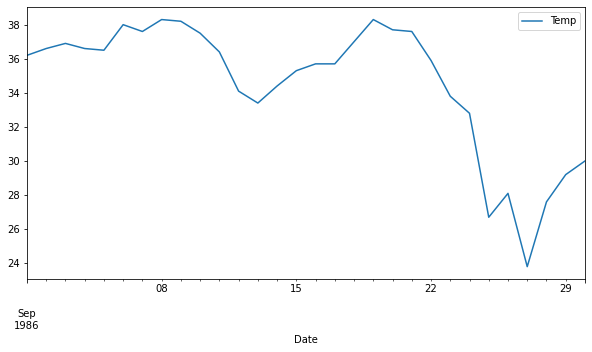

In [72]:
tmax['1986-09'].plot(figsize=(10,5))

#### <b> Try? <b>

What was temperature in Delhi at your burthsday (if your birhtday is in the dataset)?

#### Another example

This is a plot of all temperatures larger than 40  degrees Celsius. What can we learn from this plot?

<AxesSubplot:xlabel='Date'>

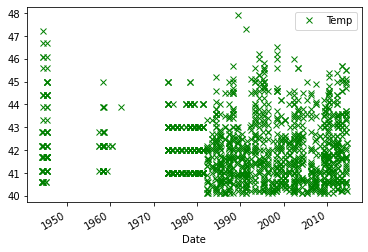

In [73]:
tmax[tmax > 40].plot(style='gx')

#### <b> Multiple columns <b>

Now let's make live a bit more interesting and get more data. This will be TMIN time series.

In [74]:
tmin = pd.read_csv('./DelhiTmin.txt',delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)
tmin.columns = ['Date', 'Temp']
tmin = tmin.set_index(['Date'])

<AxesSubplot:xlabel='Date'>

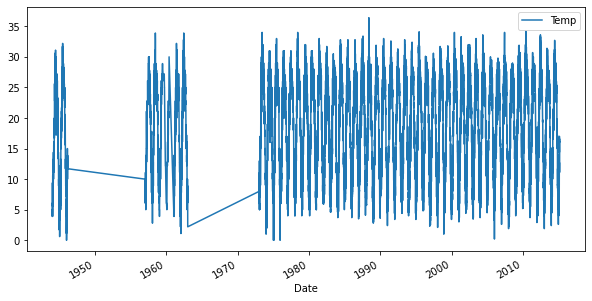

In [75]:
tmin.plot(figsize=(10,5))

Note, that number of values in `tmin` and `tmax` are not the same:

In [76]:
tmin.describe()

,Temp
count,14208.000000
mean,18.530961
std,7.808766
min,0.000000
25%,11.400000
50%,19.500000
75%,25.600000
max,36.400000


In [77]:
tmax.describe()

,Temp
count,15436.000000
mean,31.402131
std,6.740111
min,9.800000
25%,26.200000
50%,32.600000
75%,36.100000
max,47.900000


We are going to create empty DataFrame with indices for every day and then fill them in with TMIN and TMAX (where they are exist) 

Create index (use period_range):

In [78]:
dd = pd.date_range('1944-01','2015-03',freq='D')

In [79]:
dd

DatetimeIndex(['1944-01-01', '1944-01-02', '1944-01-03', '1944-01-04',
               '1944-01-05', '1944-01-06', '1944-01-07', '1944-01-08',
               '1944-01-09', '1944-01-10',
               ...
               '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23',
               '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27',
               '2015-02-28', '2015-03-01'],
              dtype='datetime64[ns]', length=25993, freq='D')

Create empty data frame:

In [80]:
tmp = pd.DataFrame(index=dd)

Now we create Data Frame, that will contain both TMAX and TMIN data. It is sort of an Excel table where the first row contain headers for the columns and firs column is an index:

In [83]:
tmp['TMIN'] = tmin
tmp['TMAX'] = tmax

In [86]:
tmp.head()

,TMIN,TMAX
1944-01-01,NaN,22.2
1944-01-02,5.0,NaN
1944-01-03,3.9,23.9
1944-01-04,5.0,22.2
1944-01-05,6.1,NaN


One can plot the data straight away:

<AxesSubplot:>

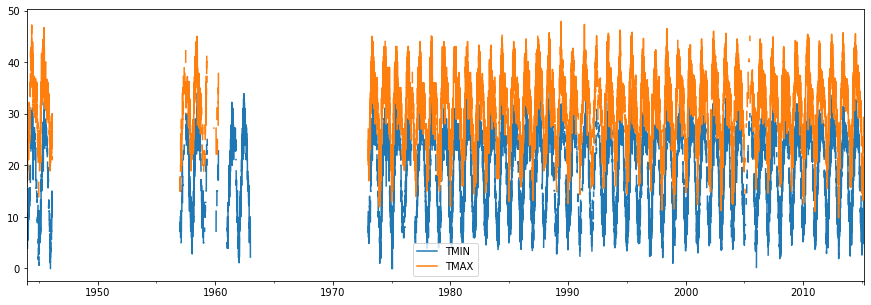

In [88]:
tmp.plot(figsize=(15,5))

We can reference each column by its name:

<AxesSubplot:>

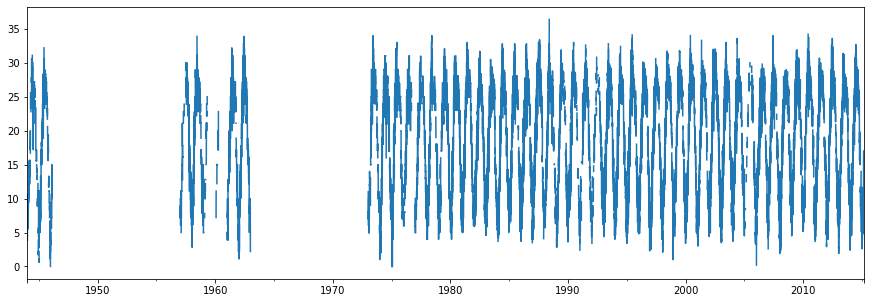

In [90]:
tmp['TMIN'].plot(figsize=(15,5))

or as a method of the Data Frame variable (if name of the variable is a valid python name):

<AxesSubplot:>

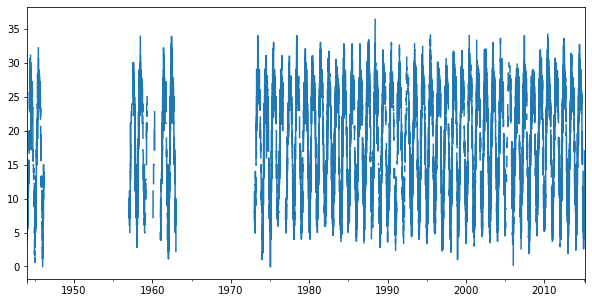

In [91]:
tmp.TMIN.plot(figsize=(10,5))

We can add column to the Data Frame:

In [92]:
tmp['mean'] = (tmp['TMAX'] + tmp['TMIN'])/2.
tmp.head()

,TMIN,TMAX,mean
1944-01-01,NaN,22.2,NaN
1944-01-02,5.0,NaN,NaN
1944-01-03,3.9,23.9,13.9
1944-01-04,5.0,22.2,13.6
1944-01-05,6.1,NaN,NaN


In [93]:
tmp['Diff'] = tmp['TMAX'] - tmp['TMIN']
tmp.head()

,TMIN,TMAX,mean,Diff
1944-01-01,NaN,22.2,NaN,NaN
1944-01-02,5.0,NaN,NaN,NaN
1944-01-03,3.9,23.9,13.9,20.0
1944-01-04,5.0,22.2,13.6,17.2
1944-01-05,6.1,NaN,NaN,NaN


<AxesSubplot:>

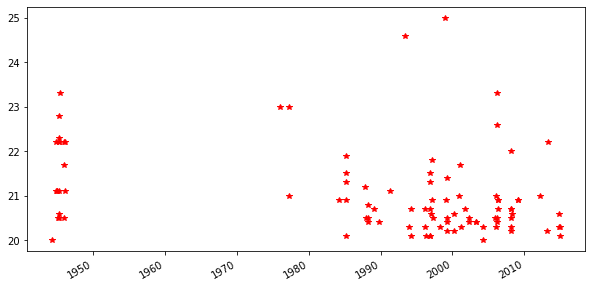

In [94]:
tmp.Diff[tmp.Diff > 20 ].plot(style='r*',figsize=(10,5))

And delete it:

In [95]:
del tmp['Diff']
del tmp['mean']
tmp.tail()

,TMIN,TMAX
2015-02-25,NaN,28.6
2015-02-26,14.5,27.6
2015-02-27,11.1,27.6
2015-02-28,12.6,29.2
2015-03-01,NaN,NaN


Slicing will also work:

<AxesSubplot:>

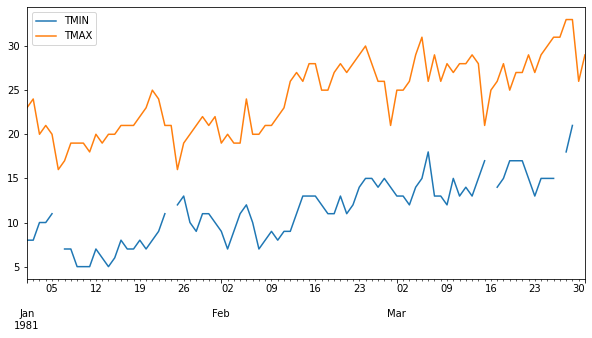

In [96]:
tmp['1981-01':'1981-03'].plot(figsize=(10,5))

## Statistics

Back to simple stuff. We can obtain statistical information over elements of the Data Frame. Default is column wise:

In [97]:
tmp.mean()

TMIN    18.530961
TMAX    31.402131
dtype: float64

In [98]:
tmp.max()

TMIN    36.4
TMAX    47.9
dtype: float64

In [99]:
tmp.min()

TMIN    0.0
TMAX    9.8
dtype: float64

You can also do it row-wise:

In [100]:
tmp.mean(1)

1944-01-01    22.20
1944-01-02     5.00
1944-01-03    13.90
1944-01-04    13.60
1944-01-05     6.10
              ...  
2015-02-25    28.60
2015-02-26    21.05
2015-02-27    19.35
2015-02-28    20.90
2015-03-01      NaN
Freq: D, Length: 25993, dtype: float64

Or get everything at once:

In [101]:
tmp.describe()

,TMIN,TMAX
count,14208.000000,15436.000000
mean,18.530961,31.402131
std,7.808766,6.740111
min,0.000000,9.800000
25%,11.400000,26.200000
50%,19.500000,32.600000
75%,25.600000,36.100000
max,36.400000,47.900000


By the way getting correlation coefficients for members of the Data Frame is as simple as:

In [102]:
tmp.corr()

,TMIN,TMAX
TMIN,1.000000,0.882849
TMAX,0.882849,1.000000


## Exercise

Find mean of all TMIN and TMAX temperatures larger than 20

## Resampling

Pandas provide easy way to resample data to different time frequency. Two main parameters for resampling is time period you resemple to and the method that you use. By default the method is mean. Following example calculates monthly ('M'):

In [103]:
tmp.resample?

Signature:
tmp.resample(
    rule,
    axis=0,
    closed: Union[str, NoneType] = None,
    label: Union[str, NoneType] = None,
    convention: str = 'start',
    kind: Union[str, NoneType] = None,
    loffset=None,
    base: Union[int, NoneType] = None,
    on=None,
    level=None,
    origin: Union[str, ForwardRef('Timestamp'), datetime.datetime, numpy.datetime64, int, numpy.int64, float] = 'start_day',
    offset: Union[ForwardRef('Timedelta'), datetime.timedelta, numpy.timedelta64, int, numpy.int64, float, str, NoneType] = None,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time
series. Object must have a datetime-like index (`DatetimeIndex`,
`PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
to the `on` or `level` keyword.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conversion.
axis : {0 or 'index', 1 or 'columns'}, default 0
   

<AxesSubplot:>

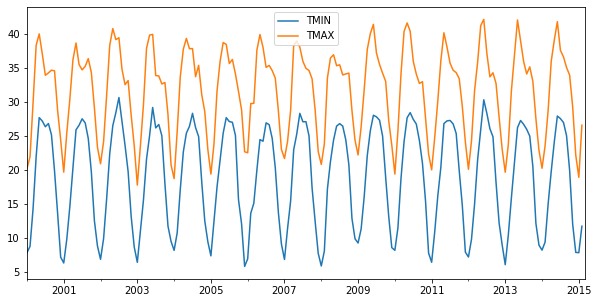

In [104]:
tmp_mm = tmp.resample("M").mean()
tmp_mm['2000':].plot(figsize=(10,5))

You can use your methods for resampling, for example np.max (in this case we change resampling frequency to 3 years):

<AxesSubplot:>

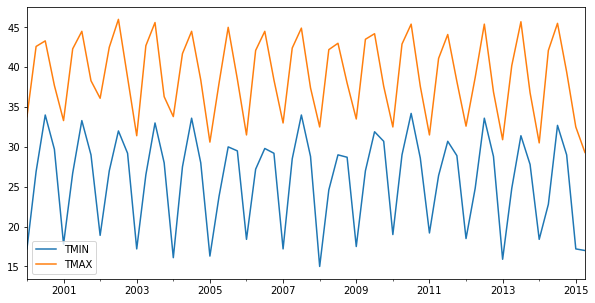

In [105]:
tmp_mm = tmp.resample("3M").apply(np.max)
tmp_mm['2000':].plot(figsize=(10,5))

You can specify several functions at once as a list:

<AxesSubplot:>

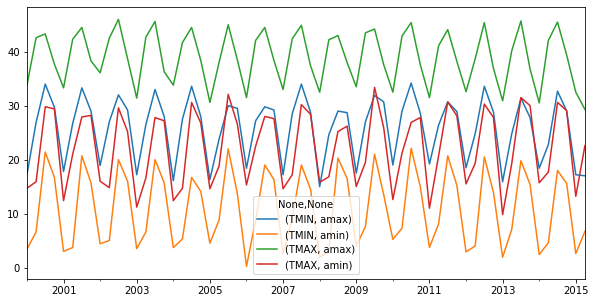

In [106]:
tmp_mm = tmp.resample("3M").apply([np.max, np.min])
tmp_mm['2000':].plot(figsize=(10,5))

## Seasonal means with resample

Initially pandas was created for analysis of financial information and it thinks not in seasons, but in quarters. So we have to resample our data to quarters. We also need to make a shift from standard quarters, so they correspond with seasons. This is done by using 'Q-NOV' as a time frequency, indicating that year in our case ends in November:

In [107]:
q_mean = tmp.resample('Q-NOV').mean()
q_mean

,TMIN,TMAX
1944-02-29,7.802174,22.386486
1944-05-31,18.810909,36.321429
1944-08-31,26.178462,36.729825
1944-11-30,17.024528,32.702667
1945-02-28,6.944286,23.422414
...,...,...
2014-05-31,19.486585,34.459551
2014-08-31,27.475641,38.603261
2014-11-30,18.868605,32.735556
2015-02-28,9.123377,22.421348


<AxesSubplot:>

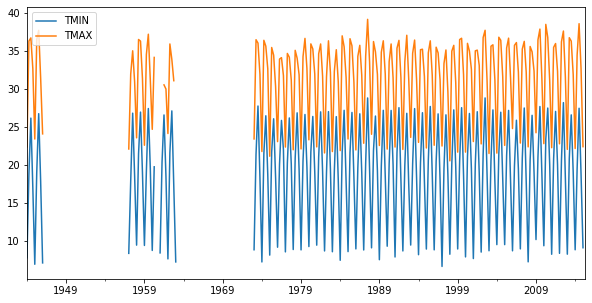

In [108]:
q_mean.plot(figsize=(10,5))

Plot winters

<AxesSubplot:>

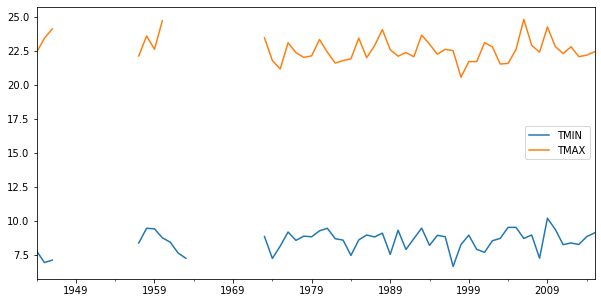

In [109]:
q_mean[q_mean.index.quarter==1].plot(figsize=(10,5))

## Multi-year monthly means with groupby

First step will be to add another column to our DataFrame with month numbers:

In [110]:
tmp['mon'] = tmp.index.month
tmp

,TMIN,TMAX,mon
1944-01-01,NaN,22.2,1
1944-01-02,5.0,NaN,1
1944-01-03,3.9,23.9,1
1944-01-04,5.0,22.2,1
1944-01-05,6.1,NaN,1
...,...,...,...
2015-02-25,NaN,28.6,2
2015-02-26,14.5,27.6,2
2015-02-27,11.1,27.6,2
2015-02-28,12.6,29.2,2


Now we can use [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to group our values by months and calculate mean for each of the groups (month in our case):

<AxesSubplot:xlabel='mon'>

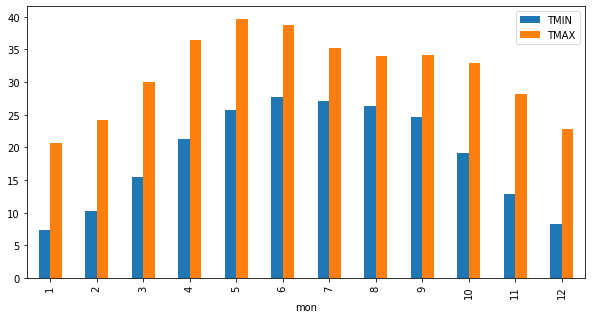

In [111]:
monmean = tmp['1950':'2013'].groupby('mon').aggregate(np.mean)
monmean.plot(kind='bar',figsize=(10,5))

<AxesSubplot:title={'center':'TMIN'}, xlabel='mon'>

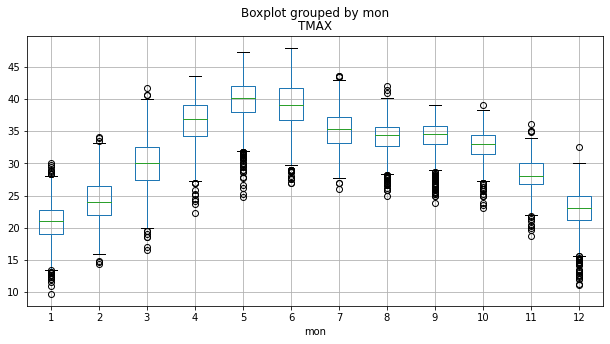

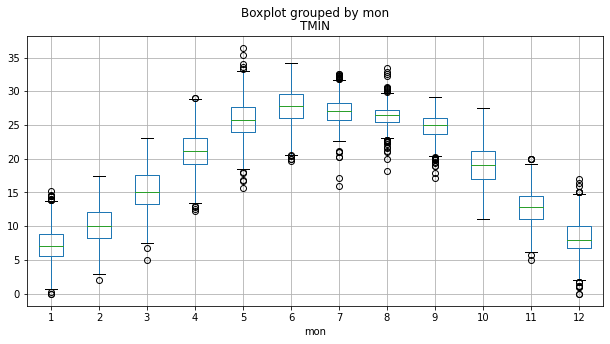

In [112]:
tmp.boxplot(column=['TMAX'], by='mon', figsize=(10,5))
tmp.boxplot(column=['TMIN'], by='mon', figsize=(10,5))

## Interpolate

In [113]:
#del tmp['mon']

<AxesSubplot:>

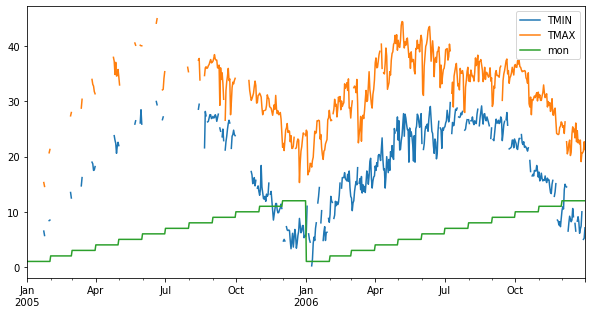

In [114]:
tmp['2005':'2006'].plot(figsize=(10,5))

We can interpolate over this gaps using `interpolate` method:

<AxesSubplot:>

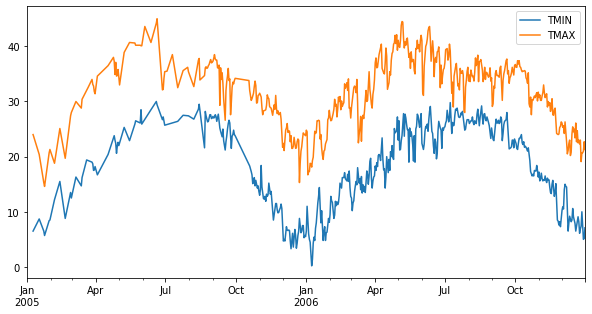

In [112]:
tmp['2005':'2006'].interpolate().plot(figsize=(10,5))

In [117]:
tmp.interpolate?

Signature:
tmp.interpolate(
    method: str = 'linear',
    axis: Union[str, int] = 0,
    limit: Optional[int] = None,
    inplace: bool = False,
    limit_direction: Optional[str] = None,
    limit_area: Optional[str] = None,
    downcast: Optional[str] = None,
    **kwargs,
) -> Optional[~FrameOrSeries]
Docstring:
Please note that only ``method='linear'`` is supported for
DataFrame/Series with a MultiIndex.

Parameters
----------
method : str, default 'linear'
    Interpolation technique to use. One of:

    * 'linear': Ignore the index and treat the values as equally
      spaced. This is the only method supported on MultiIndexes.
    * 'time': Works on daily and higher resolution data to interpolate
      given length of interval.
    * 'index', 'values': use the actual numerical values of the index.
    * 'pad': Fill in NaNs using existing values.
    * 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline',
      'barycentric', 'polynomial': Passed to
      `scipy.interpol

Interpolation with use of another interpolation method:

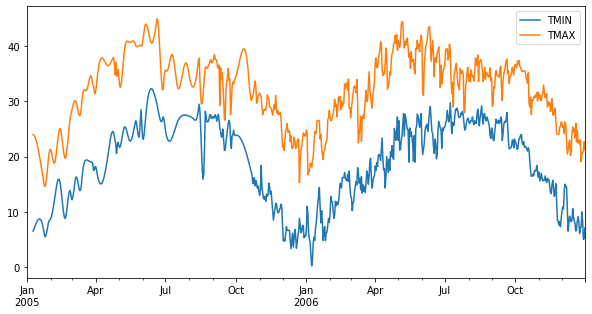

In [118]:
ax = tmp['2005':'2006'].interpolate(method='cubic').plot(figsize=(10,5))

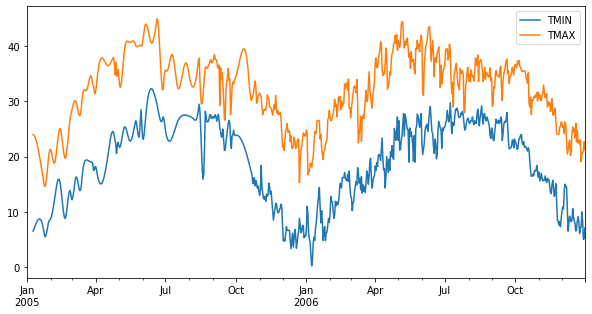

In [124]:
ax = tmp['2005':'2006'].interpolate(method='polynomial', order=3).plot(figsize=(10,5))

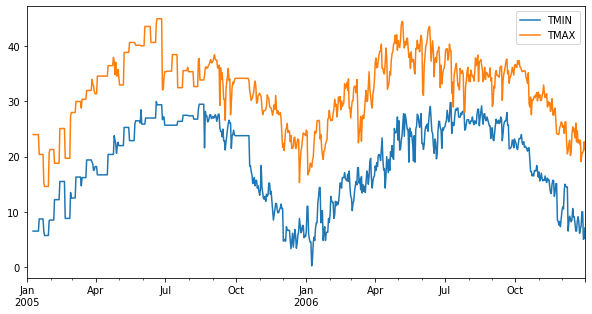

In [125]:
ax = tmp['2005':'2006'].interpolate(method='pad').plot(figsize=(10,5))

## Links

[Time Series Data Analysis with pandas (Video)](http://www.youtube.com/watch?v=0unf-C-pBYE)

[Data analysis in Python with pandas (Video)](http://www.youtube.com/watch?v=w26x-z-BdWQ)

[Pandas and real world data (Video)](https://www.youtube.com/watch?v=eMOA1pPVUc4)